In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
def RMSE(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
df =pd.read_csv('../input/top50spotify2019/top50.csv',encoding='ISO-8859-1')
df.head(5)

Unnamed: 0                       Track.Name    Artist.Name           Genre  \
0           1                         Señorita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [5]:
info = df.describe()

In [6]:
df.isna().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [7]:
df.nunique()

Track.Name          50
Artist.Name         38
Genre               21
Beats.Per.Minute    31
Energy              31
Danceability        29
Loudness..dB..       9
Liveness            22
Valence.            39
Length.             44
Acousticness..      35
Speechiness.        24
Popularity          18
dtype: int64

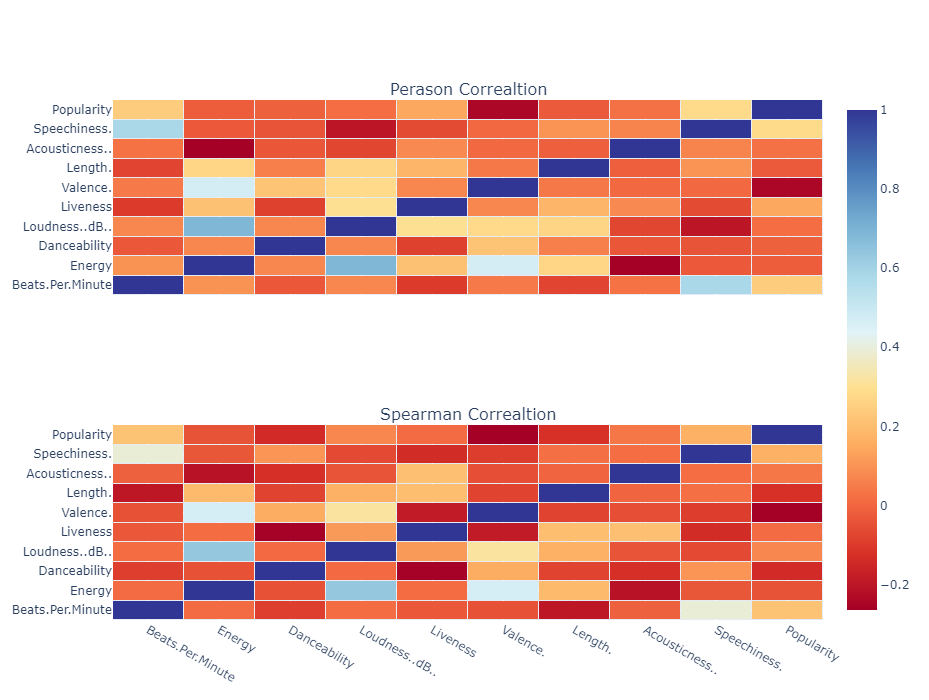

In [8]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  
                                                                     'Spearman Correaltion'))
colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]

df_val = df.corr('pearson')
df_idx = df_val.index
df_col = df_val.columns
df_val = df_val.values
fig.add_trace(
    go.Heatmap(x=df_col,y=df_idx,z=df_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)
df_val = df.corr('spearman')
df_idx = df_val.index
df_col = df_val.columns
df_val = df_val.values

fig.add_trace(
    go.Heatmap(x=df_col,y=df_idx,z=df_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900)
fig.show()



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



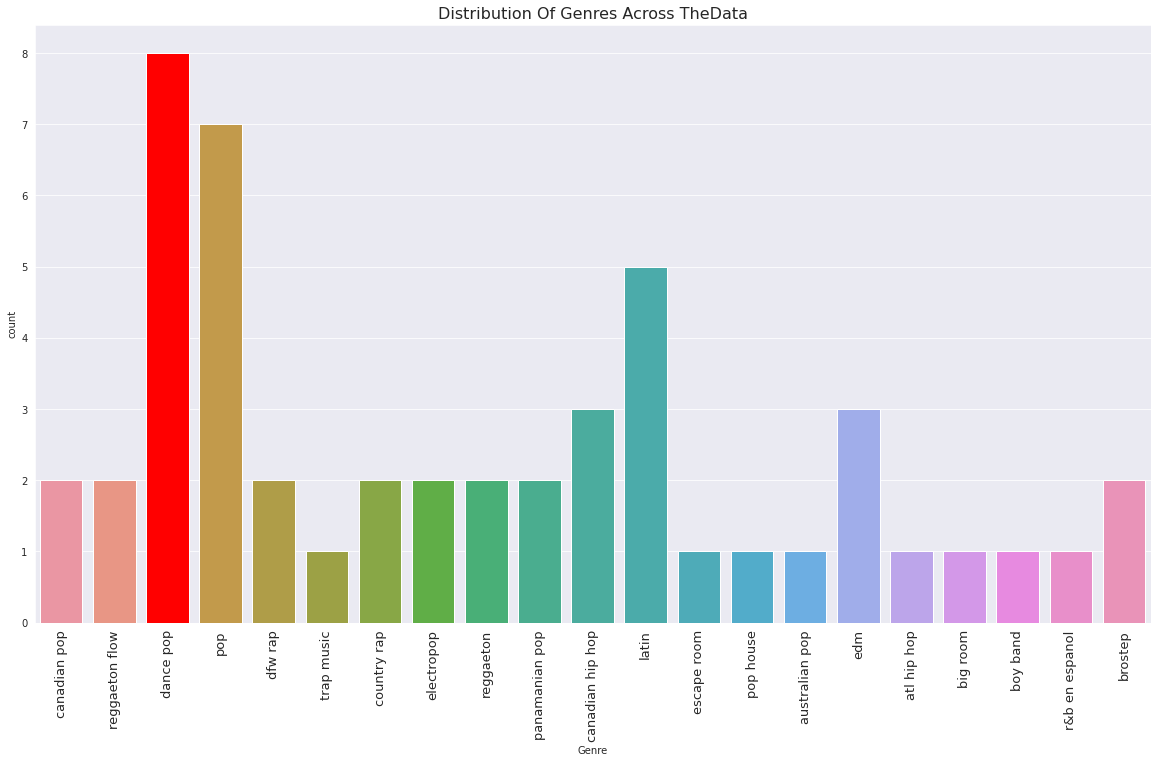

In [9]:
ax = sns.countplot(df['Genre'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13)
ax.set_title('Distribution Of Genres Across TheData',fontsize=16)
ax.patches[2].set_fc('r')
plt.show()

In [10]:
main_genres = ['rock','pop','blues','hip hop','jazz','reggae','techno','trap','regga','rap','r&b']
def check_genre(sir):
    for word in main_genres:
        if sir.find(word) != -1:
            if word == 'rap':
                return 'hip hop'
            else:
                return word
    return sir

df['Main.Genre'] = df['Genre'].apply(check_genre)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



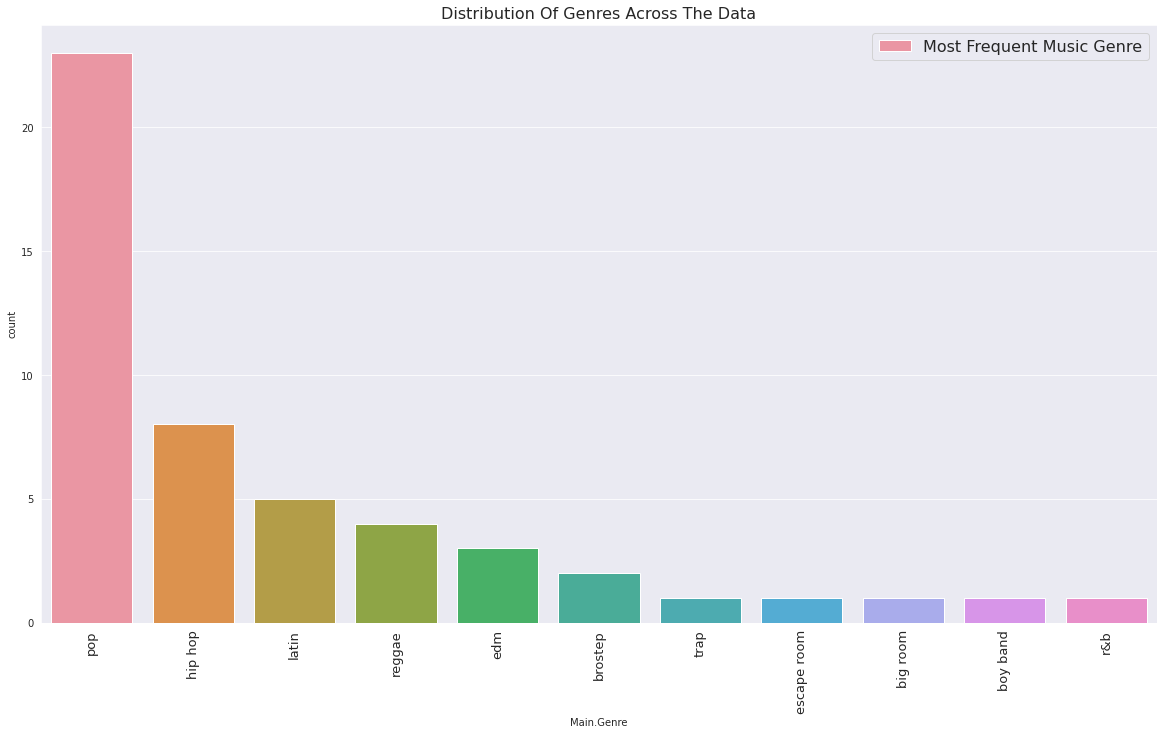

In [11]:
ax = sns.countplot(df['Main.Genre'],order=df['Main.Genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13)
ax.set_title('Distribution Of Genres Across The Data',fontsize=16)
plt.legend({'Most Frequent Music Genre':0},prop={'size':'16'})
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



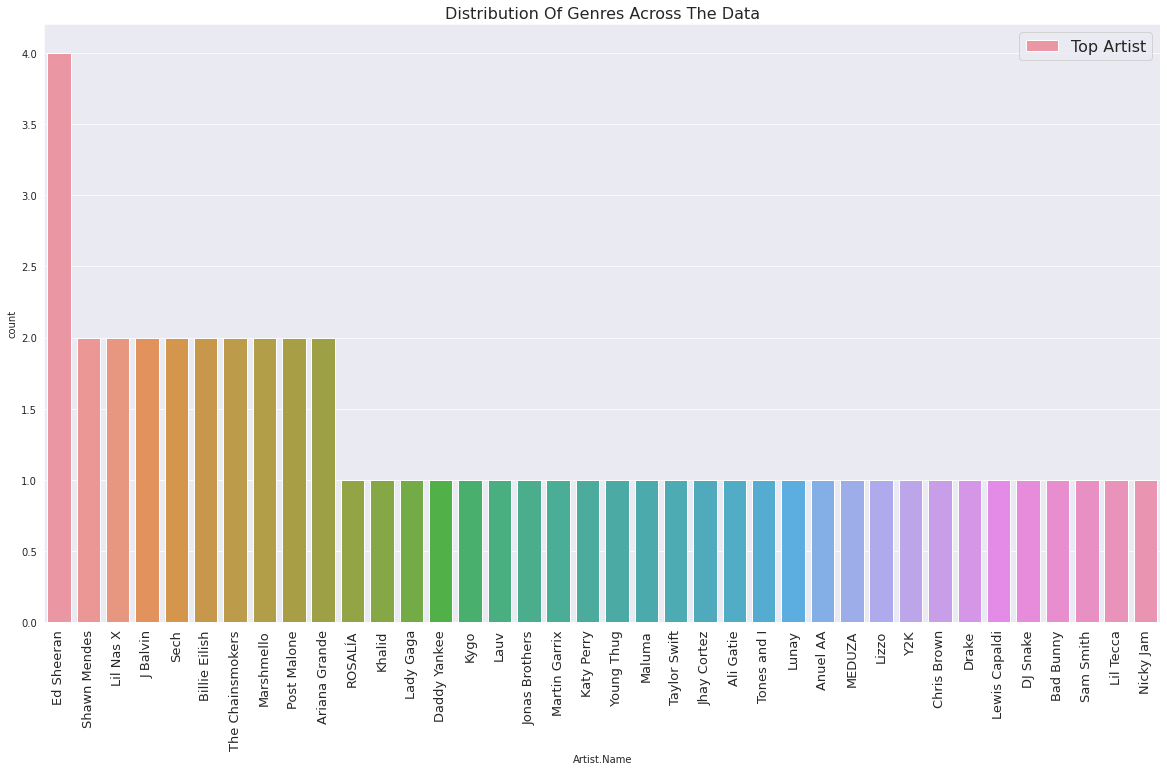

In [12]:
ax = sns.countplot(df['Artist.Name'],order = df['Artist.Name'].value_counts().index,label='Top Artist')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,size=13)
ax.set_title('Distribution Of Genres Across The Data',fontsize=16)
plt.legend(prop={'size':'16'})
plt.show()

In [13]:
top_10_artist = df['Artist.Name'].value_counts()[:10]
top_10_genres = df['Genre'].value_counts()[:10]
top_10_songs = df.iloc[df['Popularity'].nlargest(10).index,:]
top_10_artist.to_frame()
top_10_songs

Track.Name    Artist.Name  \
9                                         bad guy  Billie Eilish   
4                     Goodbyes (Feat. Young Thug)    Post Malone   
10                                       Callaita      Bad Bunny   
1                                           China       Anuel AA   
6                                          Ransom      Lil Tecca   
14       Money In The Grave (Drake ft. Rick Ross)          Drake   
17  Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
19                                    Truth Hurts          Lizzo   
20                            Piece Of Your Heart         MEDUZA   
21                                         Panini      Lil Nas X   

               Genre  Beats.Per.Minute  Energy  Danceability  Loudness..dB..  \
9         electropop               135      43            70             -11   
4            dfw rap               150      65            58              -4   
10         reggaeton               176      62            61              -5   
1     reggaeton flow               105      81            79              -4   
6         trap music               180      64            75              -6   
14  canadian hip hop               101      50            83              -4   
17           dfw rap                90      48            76              -6   
19       escape room               158      62            72              -3   
20         pop house               124      74            68              -7   
21       country rap               154      59            70              -6   

    Liveness  Valence.  Length.  Acousticness..  Speechiness.  Popularity  \
9         10        56      194              33            38          95   
4         11        18      175              45             7          94   
10        24        24      251              60            31          93   
1          8        61      302               8             9          92   
6          7        23      131               2            29          92   
14        12        10      205              10             5          92   
17         7        91      158              56             5          91   
19        12        41      173              11            11          91   
20         7        63      153               4             3          91   
21        12        48      115              34             8          91   

     Main.Genre  
9           pop  
4       hip hop  
10       reggae  
1        reggae  
6          trap  
14      hip hop  
17      hip hop  
19  escape room  
20          pop  
21      hip hop

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



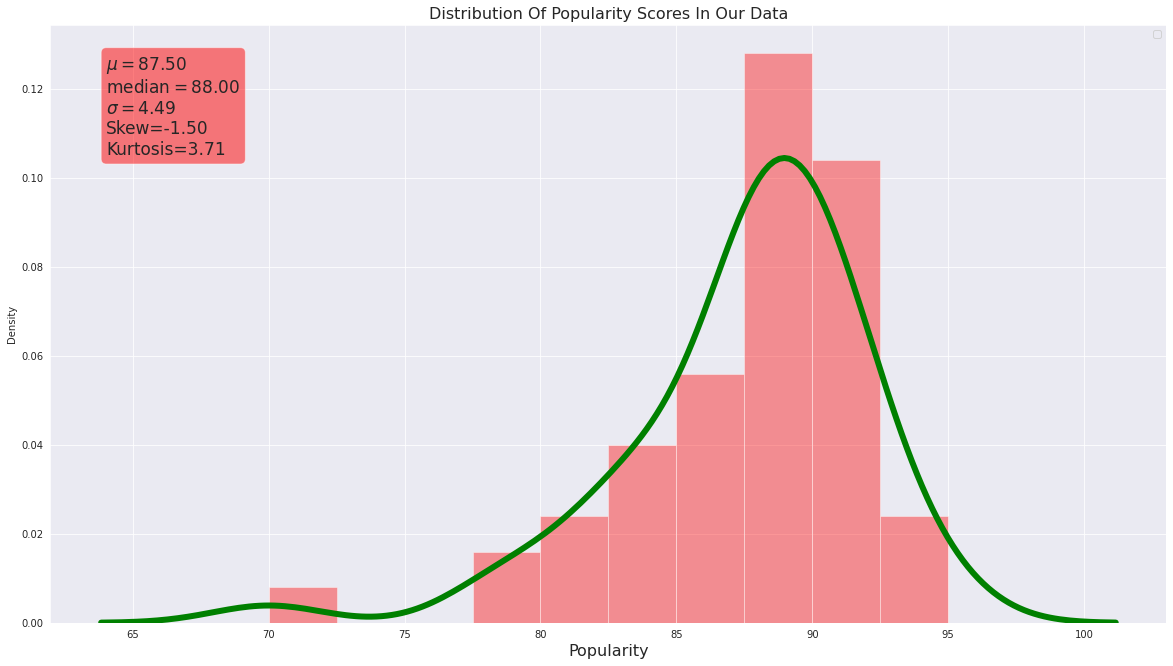

In [14]:
ax = sns.distplot(df['Popularity'],hist_kws={'color':'r'},kde_kws={'color':'g','lw':'6'})
textstr = '\n'.join(
    
        (   r'$\mu=%.2f$' % (df['Popularity'].mean(),)
          , r'$\mathrm{median}=%.2f$' % (df['Popularity'].median(),)
          , r'$\sigma=%.2f$' % (df['Popularity'].std(),)
          , r'Skew=%.2f' % (df['Popularity'].skew(),)
          , r'Kurtosis=%.2f' % (df['Popularity'].kurt(),)

        )
    
     )

props = dict(boxstyle='round', facecolor='red', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=17,verticalalignment='top', bbox=props)
ax.set_title('Distribution Of Popularity Scores In Our Data',fontsize=16)
ax.set_xlabel('Popularity',fontsize=16)
plt.legend()
plt.show()

In [15]:
gender = {'Ed Sheeran':'M','The Chainsmokers':'Group','Shawn Mendes':'M','Post Malone':'M','Sech':'M','Marshmello':'M','Billie Eilish':'F','J Balvin':'M',
         'Lil Nas X':'M','Ariana Grande':'F','Daddy Yankee':'M','Y2K':'M','DJ Snake':'M','Lewis Capaldi':'M','Chris Brown':'M','Khalid':'M','Lizzo':'F','Lauv':'M',
         'Kygo':'M','Ali Gatie':'M','Lady Gaga':'F','Bad Bunny':'M','Lunay':'M','Sam Smith':'M','Anuel AA':'M','Nicky Jam':'M','Lil Tecca':'M','ROSALÍA':'F','Young Thug':'M',
         'Martin Garrix':'M','Katy Perry':'F','Jhay Cortez':'M','Drake':'M','Tones and I':'F','Taylor Swift':'F','Jonas Brothers':'Group','MEDUZA':'M','Maluma':'M'}
df['Artist.Gender'] = df['Artist.Name'].apply(lambda x: gender[x])

In [16]:
top_10_arist_df =df[df['Artist.Name'].isin(top_10_artist.index)]
sia = SentimentIntensityAnalyzer()
top_10_arist_df['Track_Name_Sentiment.c'] = top_10_arist_df['Track.Name'].apply(lambda x: sia.polarity_scores(x)['compound'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



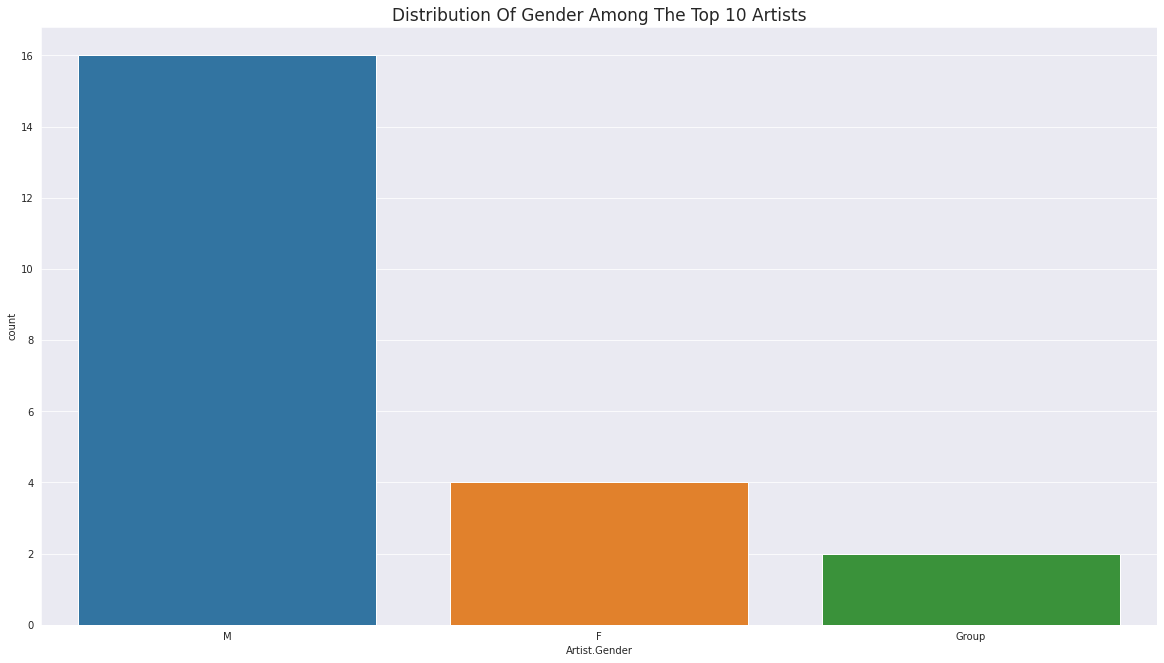

In [17]:
plt.figure(figsize=(20,11))
ax = sns.countplot(top_10_arist_df['Artist.Gender'])
ax.set_title('Distribution Of Gender Among The Top 10 Artists',fontsize=17)
plt.show()

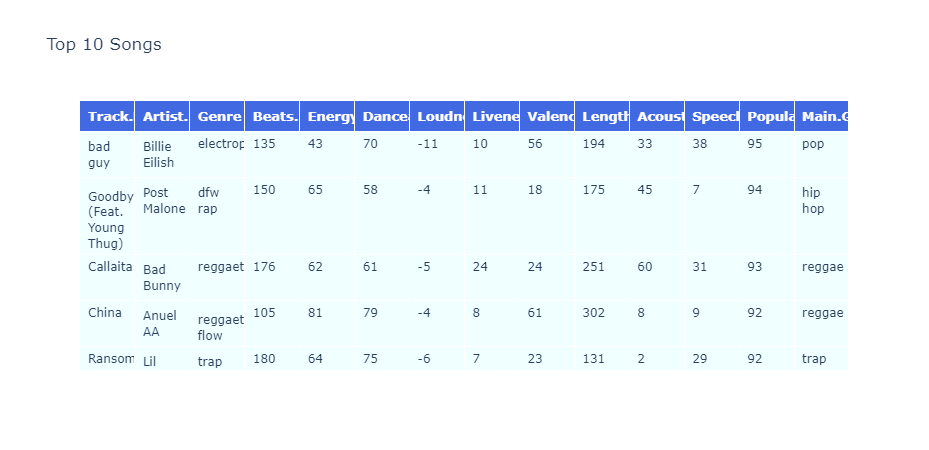

In [18]:

fig = go.Figure(data=[go.Table(
    header=dict(values=list([f'<b>{x}<b>' for x in top_10_songs.columns]),
                fill_color='royalblue',
                font_color='white',
                font_size=13,
                align='left'),
    cells=dict(values=[top_10_songs[col] for col in top_10_songs.columns],
               fill_color='azure',
               align='left'))
])
fig.update_layout(title='Top 10 Songs')
fig.show()

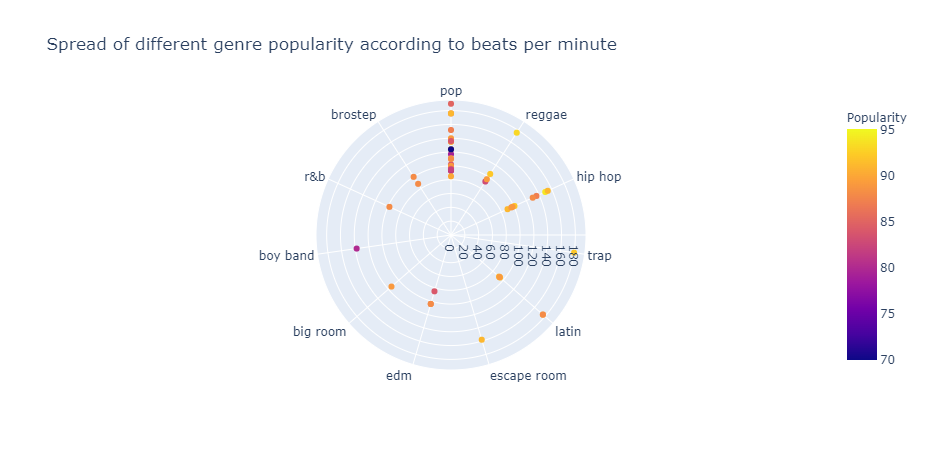

In [19]:
ex.scatter_polar(df,theta='Main.Genre',r='Beats.Per.Minute',color ='Popularity',title='Spread of different genre popularity according to beats per minute')

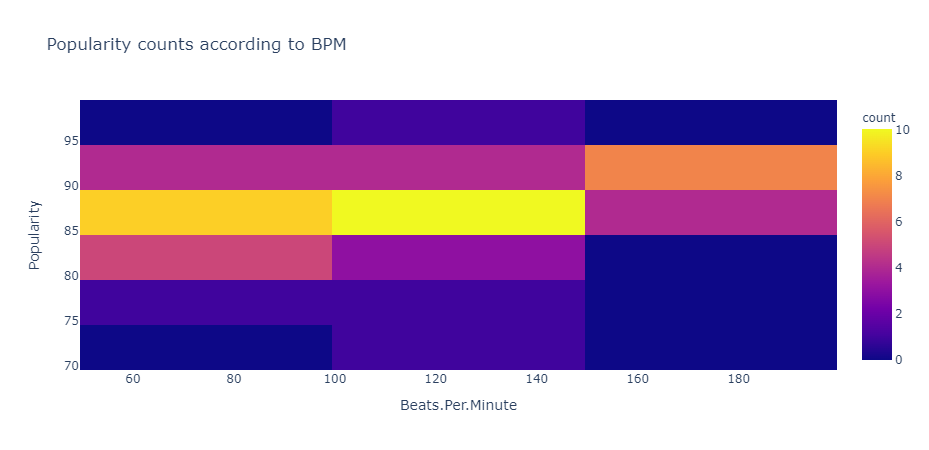

In [20]:
ex.density_heatmap(df,x='Beats.Per.Minute',y='Popularity',title='Popularity counts according to BPM ')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3

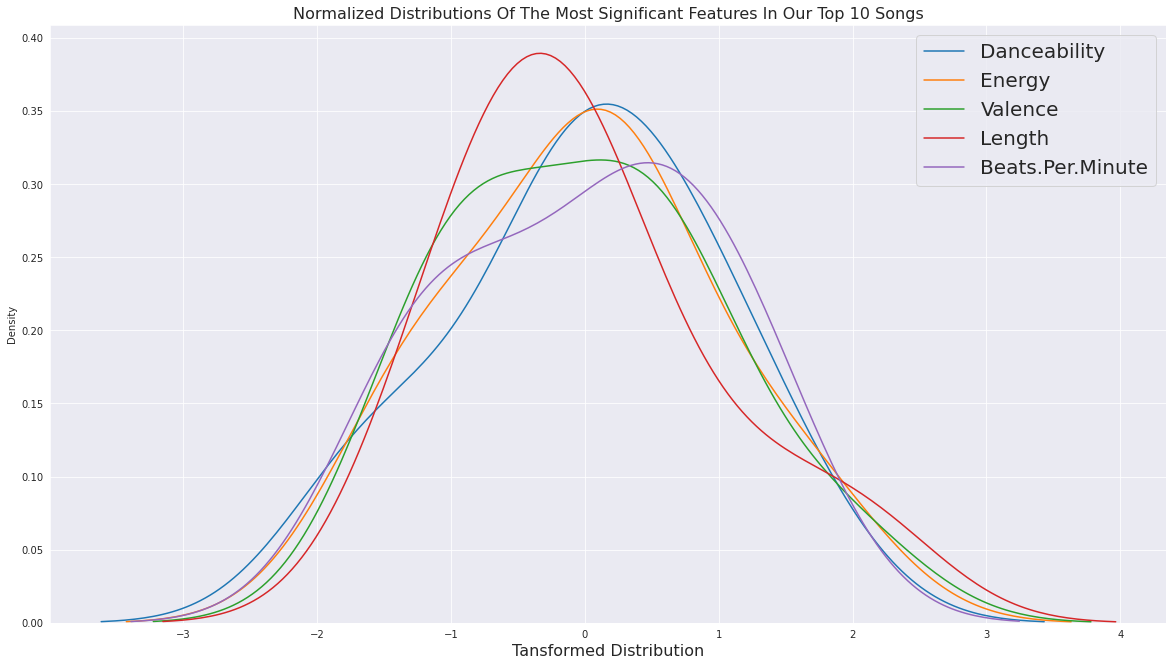

In [21]:
numeric_f = top_10_songs.columns[3:13]
cor = top_10_songs.corr()
ax = sns.distplot((top_10_songs['Danceability']-top_10_songs['Danceability'].mean())/top_10_songs['Danceability'].std(),hist=False,label='Danceability')
ax = sns.distplot((top_10_songs['Energy']-top_10_songs['Energy'].mean())/top_10_songs['Energy'].std(),hist=False,label='Energy')
ax = sns.distplot((top_10_songs['Valence.']-top_10_songs['Valence.'].mean())/top_10_songs['Valence.'].std(),hist=False,label='Valence')
ax = sns.distplot((top_10_songs['Length.']-top_10_songs['Length.'].mean())/top_10_songs['Length.'].std(),hist=False,label='Length')
ax = sns.distplot((top_10_songs['Beats.Per.Minute']-top_10_songs['Beats.Per.Minute'].mean())/top_10_songs['Beats.Per.Minute'].std(),hist=False,label='Beats.Per.Minute')
ax.set_xlabel('Tansformed Distribution',fontsize=16)
ax.set_title('Normalized Distributions Of The Most Significant Features In Our Top 10 Songs',fontsize=16)
plt.legend(prop={'size':'20'})
plt.show()

In [22]:
cop_df = df.copy()
geners_one = pd.get_dummies(cop_df['Main.Genre'],prefix='Genre')
geners_one = geners_one[geners_one.columns[1:]]
cop_df = pd.concat([cop_df,geners_one],axis=1)
cop_df = cop_df.drop(columns='Main.Genre')

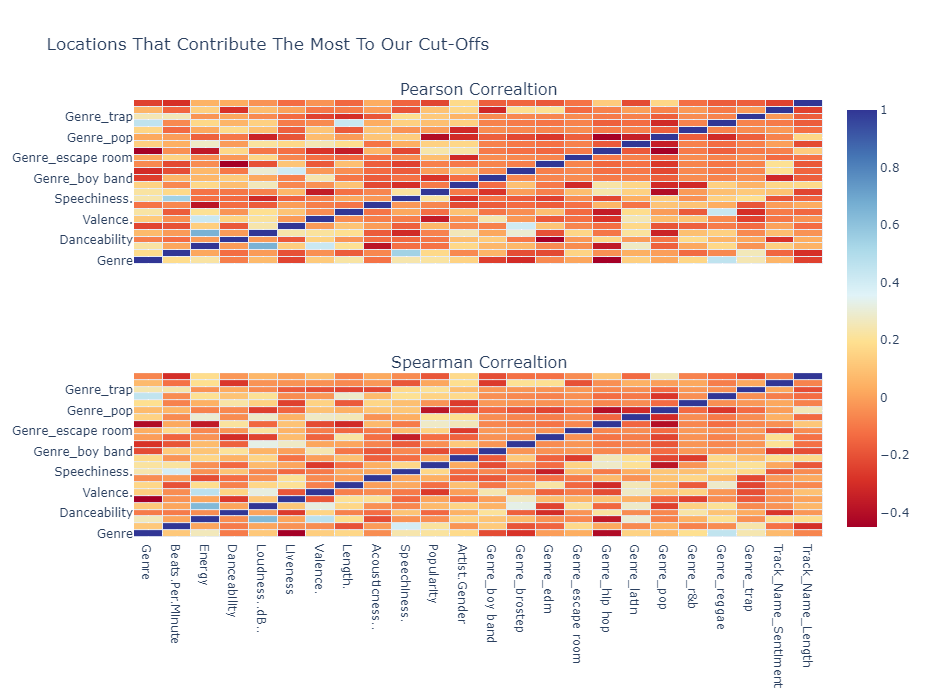

In [23]:
cop_df['Track_Name_Sentiment'] = cop_df['Track.Name'].apply(lambda x: sia.polarity_scores(x)['compound'])
cop_df['Track_Name_Length'] = cop_df['Track.Name'].apply(lambda x: len(x))
cop_df['Genre'] = cop_df['Genre'].astype('category').cat.codes
cop_df['Artist.Gender'] = cop_df['Artist.Gender'].astype('category').cat.codes


fig = make_subplots(rows=2, cols=1,shared_xaxes=True, subplot_titles=('Pearson Correaltion',  'Spearman Correaltion'))
colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]
s_val = cop_df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val = cop_df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Locations That Contribute The Most To Our Cut-Offs")
fig.show()

In [24]:
cop_df

Track.Name       Artist.Name  \
0                                            Señorita      Shawn Mendes   
1                                               China          Anuel AA   
2                       boyfriend (with Social House)     Ariana Grande   
3                     Beautiful People (feat. Khalid)        Ed Sheeran   
4                         Goodbyes (Feat. Young Thug)       Post Malone   
5                   I Don't Care (with Justin Bieber)        Ed Sheeran   
6                                              Ransom         Lil Tecca   
7                                   How Do You Sleep?         Sam Smith   
8                               Old Town Road - Remix         Lil Nas X   
9                                             bad guy     Billie Eilish   
10                                           Callaita         Bad Bunny   
11              Loco Contigo (feat. J. Balvin & Tyga)          DJ Snake   
12                                  Someone You Loved     Lewis Capaldi   
13                                 Otro Trago - Remix              Sech   
14           Money In The Grave (Drake ft. Rick Ross)             Drake   
15                          No Guidance (feat. Drake)       Chris Brown   
16                                         LA CANCIÓN          J Balvin   
17      Sunflower - Spider-Man: Into the Spider-Verse       Post Malone   
18                                             Lalala               Y2K   
19                                        Truth Hurts             Lizzo   
20                                Piece Of Your Heart            MEDUZA   
21                                             Panini         Lil Nas X   
22                               No Me Conoce - Remix       Jhay Cortez   
23                                    Soltera - Remix             Lunay   
24                       bad guy (with Justin Bieber)     Billie Eilish   
25                                If I Can't Have You      Shawn Mendes   
26                                       Dance Monkey       Tones and I   
27                                           It's You         Ali Gatie   
28                                          Con Calma      Daddy Yankee   
29                                      QUE PRETENDES          J Balvin   
30                                           Takeaway  The Chainsmokers   
31                                            7 rings     Ariana Grande   
32                                  0.958333333333333            Maluma   
33          The London (feat. J. Cole & Travis Scott)        Young Thug   
34                                  Never Really Over        Katy Perry   
35  Summer Days (feat. Macklemore & Patrick Stump ...     Martin Garrix   
36                                         Otro Trago              Sech   
37                     Antisocial (with Travis Scott)        Ed Sheeran   
38                                             Sucker    Jonas Brothers   
39  fuck, i'm lonely (with Anne-Marie) - from 13 ...              Lauv   
40                                        Higher Love              Kygo   
41                              You Need To Calm Down      Taylor Swift   
42                                            Shallow         Lady Gaga   
43                                               Talk            Khalid   
44                                         Con Altura           ROSALÍA   
45                                    One Thing Right        Marshmello   
46                                          Te Robaré         Nicky Jam   
47                                            Happier        Marshmello   
48                                      Call You Mine  The Chainsmokers   
49      Cross Me (feat. Chance the Rapper & PnB Rock)        Ed Sheeran   

    Genre  Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  \
0       6               117      55            76              -6         8   
1      19               105      81            79          

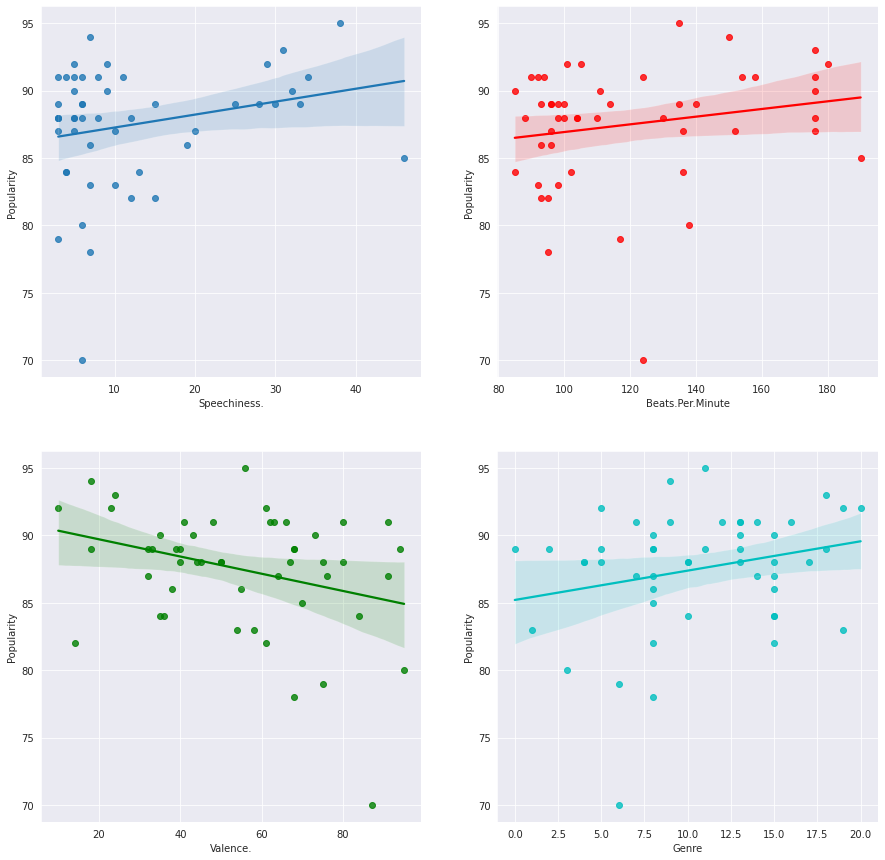

In [25]:
p_correaltion=['Speechiness.','Beats.Per.Minute','Valence.','Genre','Genre_hip hop']
fig,axs = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
sns.regplot(y=cop_df['Popularity'],x=cop_df[p_correaltion[1]],ax=axs[0,1],color='r')
sns.regplot(y=cop_df['Popularity'],x=cop_df[p_correaltion[0]],ax=axs[0,0])
sns.regplot(y=cop_df['Popularity'],x=cop_df[p_correaltion[2]],ax=axs[1,0],color='g')
sns.regplot(y=cop_df['Popularity'],x=cop_df[p_correaltion[3]],ax=axs[1,1],color='c')
plt.show()

In [26]:
y = cop_df['Popularity']
X = cop_df[['Speechiness.','Beats.Per.Minute','Valence.','Genre','Genre_hip hop','Genre_escape room','Genre_r&b']]

In [27]:
#Knn Pipe
Knn_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',KNeighborsRegressor(n_neighbors=5))])
Knn_scores = np.sqrt(-1*cross_val_score(Knn_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
Knn_Pipe.fit(X,y)

#Random Forest Pipe
RF_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',RandomForestRegressor(max_leaf_nodes=14,n_estimators=20,random_state=42))])
RF_scores = np.sqrt(-1*cross_val_score(RF_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
RF_Pipe.fit(X,y)

#Decision Tree Pipe
DT_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',DecisionTreeRegressor(max_leaf_nodes=10))])
DT_scores = np.sqrt(-1*cross_val_score(DT_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
DT_Pipe.fit(X,y)

#Linear Regression Pipe
LR_pipe = Pipeline(steps=[('scaler',StandardScaler()),('poly',PolynomialFeatures(degree=1)),('LinearRegression',LinearRegression())])
LR_scores = np.sqrt(-1*cross_val_score(LR_pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
LR_pipe.fit(X,y)

pred = LR_pipe.predict(X)
mse = np.sqrt(mean_squared_error(pred,y))


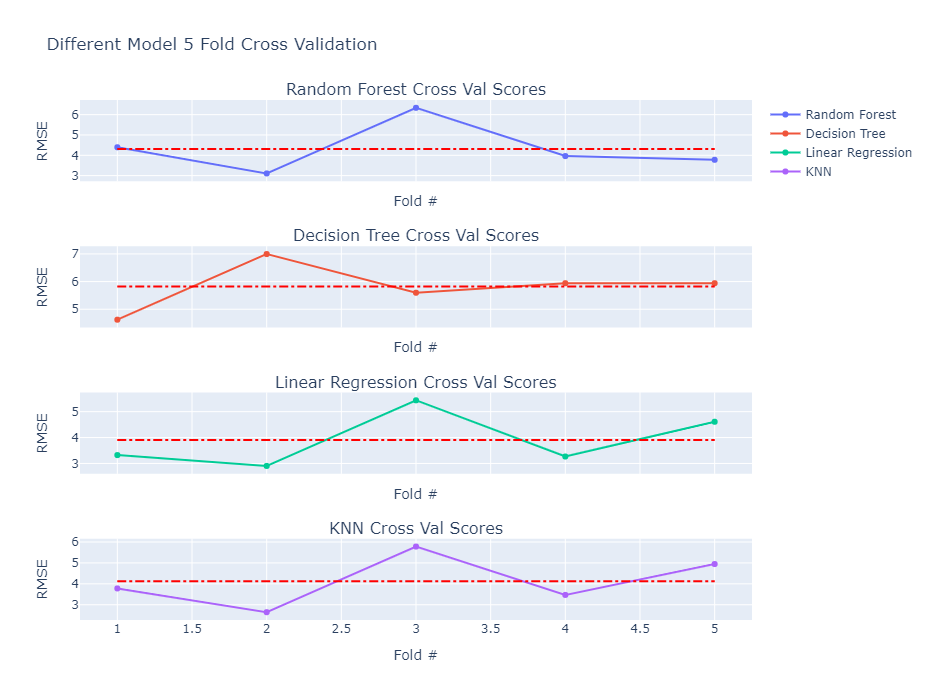

In [28]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Decision Tree Cross Val Scores',
                                                                    'Linear Regression Cross Val Scores',
                                                                    'KNN Cross Val Scores'))

fig.add_trace(
    go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines+markers',name='Random Forest'),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines+markers',name='Decision Tree'),
    row=2, col=1)

fig.add_trace(
    go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines+markers',name='Linear Regression'),
    row=3, col=1)

fig.add_trace(
    go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines+markers',name='KNN'),
    row=4, col=1)

fig.add_shape(type="line",
x0=1, y0=np.mean(RF_scores), x1=5, y1=np.mean(RF_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1', 
        yref='y1')

fig.add_shape(type="line",
    x0=1, y0=np.mean(DT_scores), x1=5, y1=np.mean(DT_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2')

fig.add_shape(type="line",
    x0=1, y0=np.mean(LR_scores), x1=5, y1=np.mean(LR_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x3', 
        yref='y3')

fig.add_shape(type="line",
    x0=1, y0=np.mean(Knn_scores), x1=5, y1=np.mean(Knn_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x4', 
        yref='y4')

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="RMSE")
fig.update_xaxes(title_text="Fold #")

fig.show()


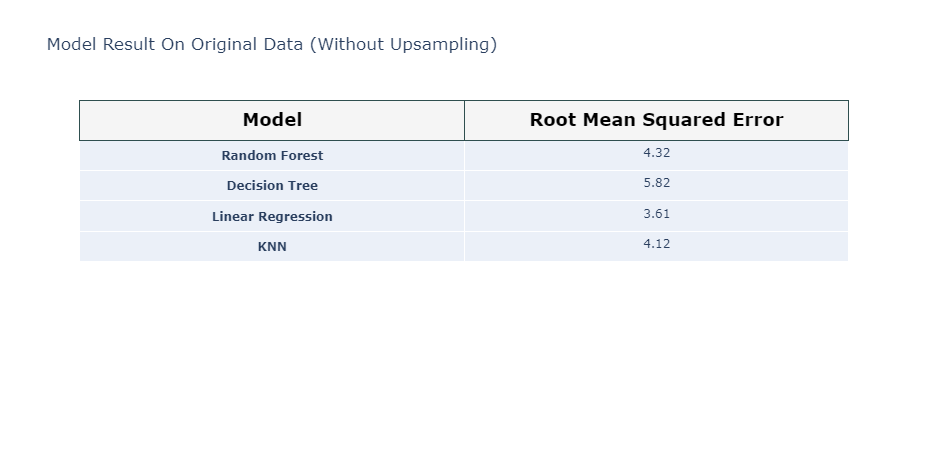

In [29]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Root Mean Squared Error<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>Decision Tree<b>','<b>Linear Regression<b>','<b>KNN<b>'],
                                    [np.round(RF_scores.mean(),2), 
                                     np.round(DT_scores.mean(),2),
                                     np.round(mse,2),
                                     np.round(Knn_scores.mean(),2) 
                                    ]]))
                     ])

fig.update_layout(title='Model Result On Original Data (Without Upsampling)')
fig.show()

In [30]:
pred = LR_pipe.predict(X)*0.2 + RF_Pipe.predict(X)*0.3 + 0.4* DT_Pipe.predict(X) + Knn_Pipe.predict(X)*0.1
rmse = RMSE(pred,y)


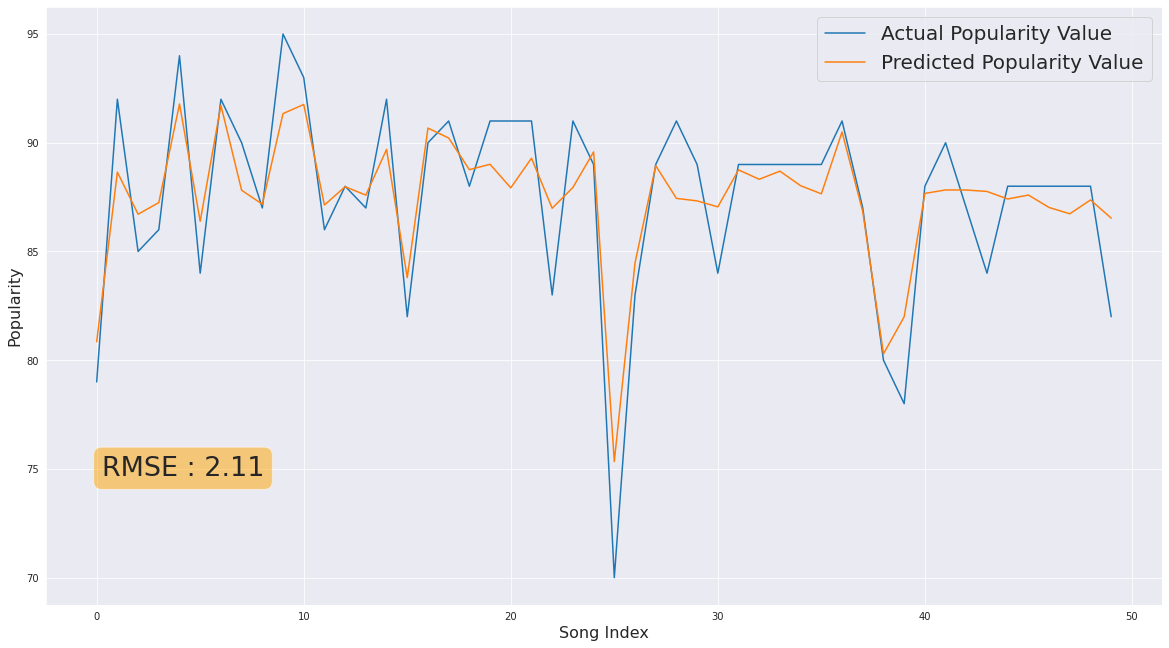

In [31]:
ax=sns.lineplot(x=np.arange(0,len(y)),y=y,label = 'Actual Popularity Value')
ax = sns.lineplot(x=np.arange(0,len(y)),y=pred,label = 'Predicted Popularity Value')
ax.set_xlabel('Song Index',fontsize=16)
ax.set_ylabel('Popularity',fontsize=16)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()


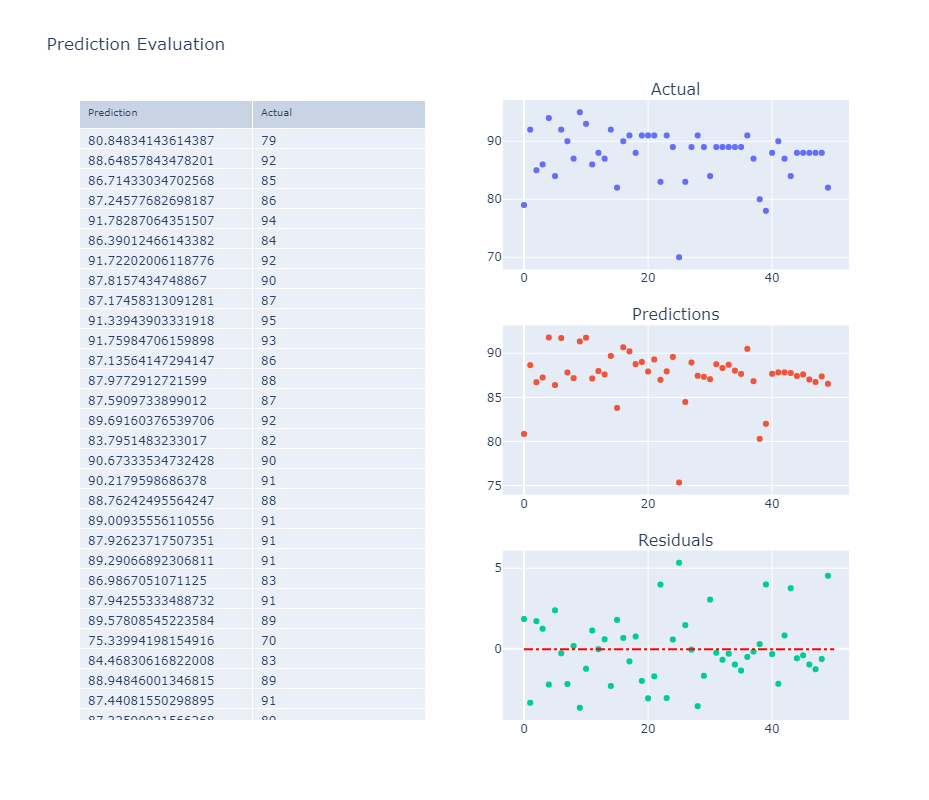

In [32]:
output=pd.DataFrame({'Prediction':pred,'Actual':y})
fig = make_subplots(
    rows=3, cols=2,subplot_titles=('','Actual','Predictions','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "table","rowspan": 3}     ,{"type": "scatter"}] ,
           [None                               ,{"type": "scatter"}]            ,           
           [None                               ,{"type": "scatter"}]                           
          ]
)

fig.add_trace(
    go.Scatter(
        x=np.arange(0,len(output["Actual"])),
        y=output["Actual"],
        mode="markers",
    ),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(
        x=np.arange(0,len(output["Prediction"])),
        y=output["Prediction"],
        mode="markers",
    ),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(
        x=np.arange(0,len(output["Prediction"])),
        y=output["Prediction"]-output["Actual"],
        mode="markers",
    ),
    row=3, col=2
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['Prediction','Actual'],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[output[k].tolist() for k in output.columns],
            align = "left")
    ),
    row=1, col=1
)

fig.add_shape(type="line",
    x0=0, y0=(output["Prediction"]-output["Actual"]).mean(), x1=len(output["Prediction"]), y1=(output["Prediction"]-output["Actual"]).mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x3', 
        yref='y3'
)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Prediction Evaluation",
)

fig.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



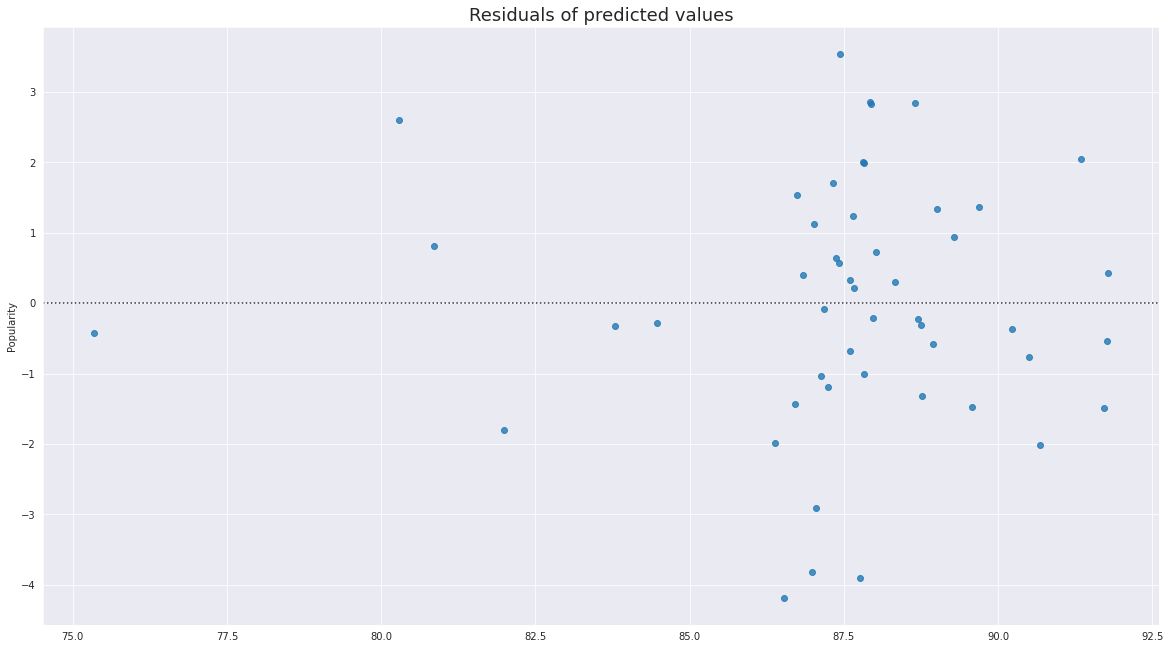

In [33]:
plt.title('Residuals of predicted values',fontsize=(18))
sns.residplot(pred,y)
plt.show()
